## スペクトルの比較

"Relative I/F"（相対的な反射率）は、スペクトル解析において特定の波長または周波数での相対的な反射率を表すために使用される用語です。相対的な反射率を計算するには、以下の一般的な手順が適用されます：

1. **スペクトルデータの収集**: まず、対象物体や試料からの光または放射線のスペクトルデータを収集します。これは通常、波長または周波数に対する強度の測定です。このデータは、スペクトロメータや分光器などの装置を使用して収集されます。

2. **基準となる反射率の取得**: 相対的な反射率を計算するためには、基準となる反射率を持つ材料または条件を必要とすることが一般的です。これは、スペクトルデータの比較基準として使用されます。基準材料は、特定の波長または周波数での反射率が既知である必要があります。

3. **相対的な反射率の計算**: 相対的な反射率は、次の数式を使用して計算されることがあります：

   相対的な反射率（Relative I/F） = （対象のスペクトルデータ） / （基準のスペクトルデータ）

   ここで、対象のスペクトルデータは対象物体や試料から収集したスペクトルデータであり、基準のスペクトルデータは基準材料または条件から収集したスペクトルデータです。

4. **データの調整と正規化**: 必要に応じて、相対的な反射率データを調整または正規化することがあります。これにより、データの比較や解釈が容易になります。

5. **解析と視覚化**: 最終的に、計算された相対的な反射率データを解析し、必要に応じてグラフ化して視覚化します。これにより、特定の波長や周波数での反射率の相対的な変化がわかり、対象物体や試料の性質や組成に関する情報を抽出できます。

この手順は一般的な相対的な反射率の計算方法ですが、具体的なアプリケーションや研究目的に応じて異なる方法や調整が必要となることがあります。また、基準材料の選定やデータ処理の詳細は、具体的な実験条件に依存するため、注意が必要です。

---

In [3]:
!pip3 install matplotlib
!pip3 install numpy
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


---
複数のデータをプロット

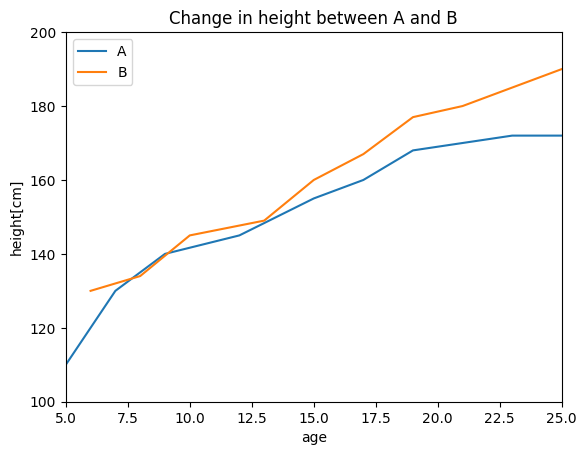

In [4]:
#matplotlibのライブラリ
import matplotlib.pyplot as plt

#x軸とx軸を設定
X1 = [5,7,9,12,15,17,19,21,23,25]
X2 = [6,8,10,13,15,17,19,21,23,25]
Y1 = [110,130,140,145,155,160,168,170,172,172]
Y2 = [130,134,145,149,160,167,177,180,185,190] #New 新たなデータを追加

#x軸ラベル
plt.xlabel("age")
#y軸ラベル
plt.ylabel("height[cm]")

#x軸範囲を指定（最小値、最大値）
plt.xlim(5,25)
#y軸範囲を指定（最小値、最大値）
plt.ylim(100,200)

#グラフタイトル
plt.title("Change in height between A and B")

#グラフのプロット
plt.plot(X1, Y1, label="A")  #2つのグラフを区別のため「ラベル」付与
plt.plot(X2, Y2, label="B") 

plt.legend() #凡例を表示
plt.show()

---
折れ線グラフ上で、存在しない座標について、指定したx座標からy座標を計算。

In [5]:
import numpy as np

x = [1,2,3,4,5]
y = [10,15,7,12,9]

# 指定したx座標
target_x = 0

# 指定したx座標に最も近いデータ点を見つける
closeset_index = np.argmin(np.abs(np.array(x) - target_x))

# 補間計算を行う
if closeset_index < len(x) - 1:
    x1, x2 = x[closeset_index], x[closeset_index +1]
    y1, y2 = y[closeset_index], y[closeset_index +1]
    target_y = y1 + (target_x - x1) * (y2 - y1) / (x2 -x1)
else:
    target_y = y[closeset_index]

print(f"x:{target_x}, y:{target_y}")


x:0, y:5.0


---
get_spectral関数を再作成

                reflectance1  reflectance2  reflectance3
wavelength[μm]                                          
1.00135                  NaN           NaN           NaN
1.00790                  NaN           NaN           NaN
1.01445              0.04965       0.24651       0.20799
1.02100              0.04932       0.24686       0.20435
1.02755              0.04749       0.24014       0.19890
...                      ...           ...           ...
3.91011              0.05505       0.31369       0.22814
3.91679              0.05382       0.31034       0.22275
3.92347              0.06155           NaN           NaN
3.93015                  NaN           NaN           NaN
3.93682                  NaN           NaN           NaN

[437 rows x 3 columns]


<AxesSubplot: xlabel='wavelength[μm]'>

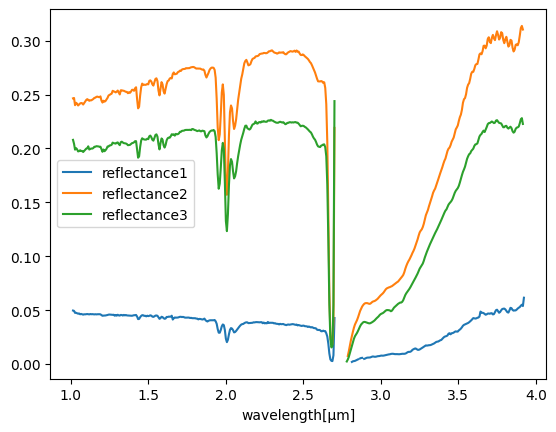

In [27]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# csvからスペクトルをndarrayで取得
def get_spectral(csvfile):
    df = pd.read_csv(csvfile)
    np_list = df[2:].to_numpy()
    return (np_list[:, 0], np_list[:, 1])

# print(ref)
# df = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv', index_col=0)
df3 = pd.read_csv('frt00003621_07_if166l_E_-97.59741 N_24.89991.csv', index_col=0)
df = df1.copy()
df = df.rename(columns={'reflectance':'reflectance1'})
df.loc[:, "reflectance2"] = df2["reflectance"]
df.loc[:, "reflectance3"] = df3["reflectance"]
print(df)
df.plot()
# df.plot(x='wavelength[μm]', y='reflectance')


---
normalization, standardization関数を再作成  
relative_reflectance関数を作成

                normalization
wavelength[μm]               
1.00135                   NaN
1.00790                   NaN
1.01445              0.800235
1.02100              0.794695
1.02755              0.763975
...                       ...
3.91011              0.890885
3.91679              0.870237
3.92347              1.000000
3.93015                   NaN
3.93682                   NaN

[437 rows x 1 columns]
                standardization
wavelength[μm]                 
1.00135                     NaN
1.00790                     NaN
1.01445                1.108574
1.02100                1.084921
1.02755                0.953756
...                         ...
3.91011                1.495620
3.91679                1.407460
3.92347                1.961508
3.93015                     NaN
3.93682                     NaN

[437 rows x 1 columns]
                relative I/F
wavelength[μm]              
1.00135                  NaN
1.00790                  NaN
1.01445             4.367976
1

<AxesSubplot: xlabel='wavelength[μm]'>

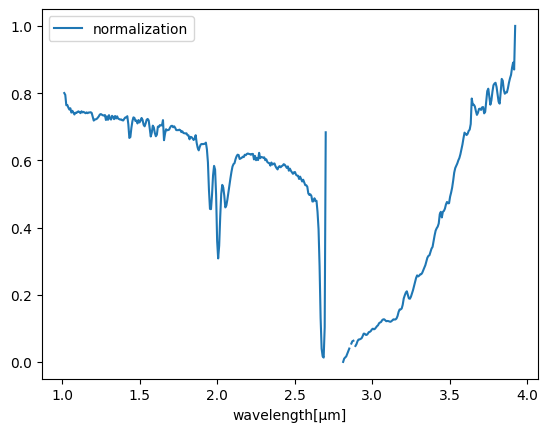

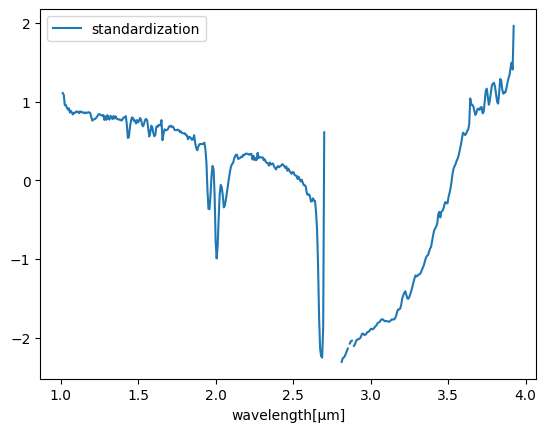

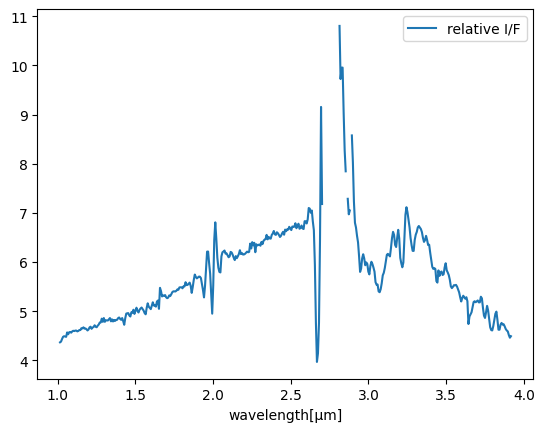

In [22]:
import numpy as np

# 正規化 min0-max1　[Min-Max normalization = Normalization] (引数：ndarrayの2次元配列)
def normalization(df, append=True):
    result = (df["reflectance"] - np.nanmin(df["reflectance"])) / (np.nanmax(df["reflectance"]) - np.nanmin(df["reflectance"]))
    if append is True:
        df.loc[:, "normalization"] = result
        return df
    elif append is False:
        df_new = pd.DataFrame(index=df.index)
        df_new.loc[:, "normalization"] = result
        return df_new

# 標準化 mean0-variance1 [Z-score normalization = Standardization] (引数：ndarrayの2次元配列)
def standardization(df, append=True):
        result = (df["reflectance"] - np.nanmean(df["reflectance"])) / np.nanstd(df["reflectance"])
        if append is True:
            df.loc[:, "standardization"] = result
            return df
        elif append is False:
            df_new = pd.DataFrame(index=df.index)
            df_new.loc[:, "standardization"] = result
            return df_new

# 相対反射率 (Relative I/F)
def relative_reflectance(df_base, df_target):
    result = df_base["reflectance"] / df_target["reflectance"]
    df_new = pd.DataFrame(index=df_base.index)
    df_new.loc[:, "relative I/F"] = result
    return df_new



df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.57339 N_24.96872.csv', index_col=0)
# print(df1)
df1_norm_new = normalization(df1, append=False)
# normalization(df2, append=False)
df1_st_new = standardization(df1, append=False)
# standardization(df2)
df1_if_new = relative_reflectance(df2, df1)

print(df1_norm_new)
print(df1_st_new)
print(df1_if_new)
# print(df2)
df1_norm_new.plot()
df1_st_new.plot()
df1_if_new.plot()


---
moving_avg関数を再作成

Size:  4


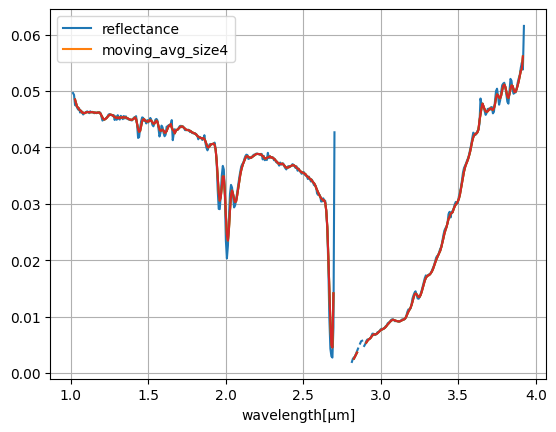

In [40]:
# !pip3 install math
import matplotlib.pyplot as plt
import math

# 移動平均 refに対してsize個での移動平均を取る (引数：ndarrayの2次元配列)
def moving_avg(df, size:int, info:bool=None):
    b = np.ones(size)/size
    ref_mean = np.convolve(df["reflectance"], b, mode="same")
    n_conv = math.ceil(size/2)
    
    # 補正部分、始めと終わり部分をsizeの半分で移動平均を取る
    ref_mean[0] *= size/n_conv
    for i in range(1, n_conv):
        ref_mean[i] *= size/(i+n_conv)
        ref_mean[-i] *= size/(i + n_conv - (size % 2)) # size%2は奇数偶数での違いに対応するため

    column_name = 'moving_avg_size' + str(size)
    df.loc[:, column_name] = ref_mean

    if info is True:
        print('Size: ', size)
        df.plot()
        
    return df

def moving_avg_numpy(arr, size):
    b = np.ones(size) / size
    ref_mean = np.convolve(arr, b, mode="same")
    n_conv = size // 2

    # 補正部分、始めと終わり部分をsizeの半分で移動平均を取る
    ref_mean[0] *= size / n_conv
    for i in range(1, n_conv):
        ref_mean[i] *= size / (i + n_conv)
        ref_mean[-i] *= size / (i + n_conv - (size % 2)) # size % 2は奇数偶数での違いに対応するため

    return ref_mean

df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)

# テストデータ
# data = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
data = df1.reflectance.values
wav = df1.index
# print(wav)

# 移動平均のサイズ
window_size = 4

result = moving_avg_numpy(data, window_size)
# print("移動平均結果:", result)


# df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
# moving_avg(df1, 4, info=True)
df_new = moving_avg(df1, 4, info=True)


plt.plot(wav, df_new.moving_avg_size4.values)
plt.plot(wav, result)
plt.grid(True)
plt.show()
# moving_avg(df1, 4, info=True)


---
stacking関数を再作成

In [35]:
import numpy as np

# 二次元のnumpy配列を作成 (例)
data = np.array([[1, 2, 30], [np.nan, np.nan, np.nan], [np.nan, 8, 0.09], [np.nan, 8, 0.09], [np.nan, 8, 0.09], [np.nan, 8, 0.09]])

# 列ごとの平均を計算 (axis=0を指定)
column_means = np.nanmean(data[1:], axis=0)
print(data[1:])
print("列ごとの平均:", column_means)


a = np.array([[np.nan, np.nan, 0.22704, 0.22614, 0.22051],
[np.nan, np.nan, 0.22608, 0.22566, 0.22]])
print(a)

print(np.nanmean(a, axis=0))


a = [np.nan, np.nan, 0.24268, 0.24275, 0.23698]
b = [np.nan, np.nan, 0.25137, 0.25148, 0.24561] 
ab = np.array([a, b])
np.nanmean(ab, axis=0)

# c = np.array([None, None, None])
# d = np.empty(3)
# e = np.array([x if x is not None else np.nan for x in c])
# d[0] = e
# d

# import numpy as np

# # array1 = np.array([1, 2, 3])
# array1 = np.empty(0)
# array2 = np.array([4, 5, 6])

# # numpy.vstack()を使用
# result_vstack = np.vstack((array1, array2))

# # numpy.column_stack()を使用
# result_column_stack = np.column_stack((array1, array2))

# print("numpy.vstack()の結果:")
# print(result_vstack)

# print("numpy.column_stack()の結果:")
# print(result_column_stack)
# import numpy as np

# # 最初の空のNumPy配列を作成
# result = np.array([])  # 空のNumPy配列
# # 配列Cを追加
# array_c = np.array([7, 8, 9])
# result = np.append(result, array_c)
# array_c = np.array([7, 4, 9])
# result = np.append(result, array_c)
# print(result)

# print(np.array([7., 4., 9.]).dtype)
# np.array([np.nan]).dtype

import numpy as np

# 空の2次元のNumPy配列を作成
empty_2d_array = np.array([]).reshape(0, 3)  # 3列の空の2次元配列

# 他の1次元配列を作成
array_to_add = np.array([1, 2, 3])

# 2次元配列に1次元配列を行方向に追加
result = np.vstack((empty_2d_array, array_to_add))
# 他の1次元配列を作成
array_to_add = np.array([1, 3, 3])

# 2次元配列に1次元配列を行方向に追加
result = np.vstack((result, array_to_add))
print(result)

[[ nan  nan  nan]
 [ nan 8.   0.09]
 [ nan 8.   0.09]
 [ nan 8.   0.09]
 [ nan 8.   0.09]]
列ごとの平均: [ nan 8.   0.09]
[[    nan     nan 0.22704 0.22614 0.22051]
 [    nan     nan 0.22608 0.22566 0.22   ]]
[     nan      nan 0.22656  0.2259   0.220255]
[[1. 2. 3.]
 [1. 3. 3.]]


/var/folders/x3/zx_610811k5839tt6q9rrz2h0000gp/T/ipykernel_920/1592890843.py:7: RuntimeWarning: Mean of empty slice
  column_means = np.nanmean(data[1:], axis=0)
/var/folders/x3/zx_610811k5839tt6q9rrz2h0000gp/T/ipykernel_920/1592890843.py:16: RuntimeWarning: Mean of empty slice
  print(np.nanmean(a, axis=0))
/var/folders/x3/zx_610811k5839tt6q9rrz2h0000gp/T/ipykernel_920/1592890843.py:22: RuntimeWarning: Mean of empty slice
  np.nanmean(ab, axis=0)


Number of reflectance:  3
Number of reflectance:  9


,stacking,reflectance1,reflectance2,reflectance3,reflectance4,reflectance5,reflectance6,reflectance7,reflectance8,reflectance9
wavelength[μm],,,,,,,,,,
1.00135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.00790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.01445,0.239718,0.24041,0.23944,0.24009,0.24050,0.23927,0.23991,0.23961,0.23901,0.23922
1.02100,0.239726,0.24105,0.24019,0.24037,0.24044,0.23866,0.23968,0.23967,0.23859,0.23888
1.02755,0.234008,0.23507,0.23430,0.23467,0.23472,0.23322,0.23366,0.23416,0.23329,0.23298
...,...,...,...,...,...,...,...,...,...,...
3.91011,0.291340,0.29528,0.29314,0.29510,0.29431,0.28967,0.29090,0.28539,0.28681,0.29146
3.91679,0.280634,0.28584,0.28142,0.28330,0.28508,0.27851,0.27905,0.27624,0.27628,0.27999
3.92347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


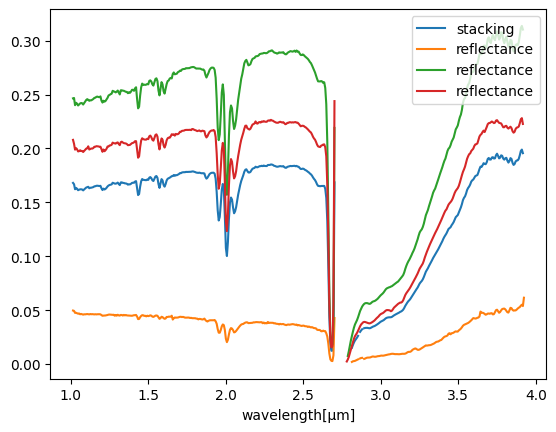

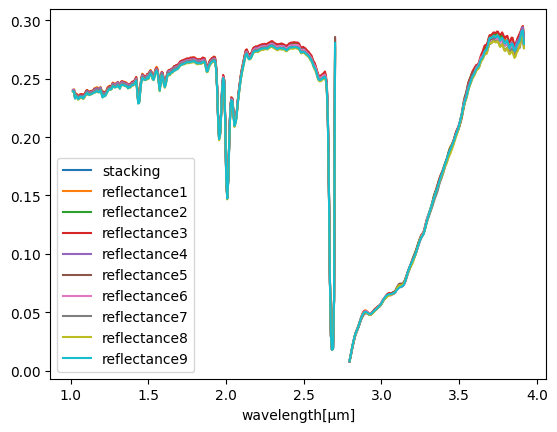

In [164]:
# スタッキング
def stacking(df, isList=None, isDF=None, info:bool=None):

    if (type(df) is list) and (isList is True):
        df_collect = pd.concat(df, axis='columns')
        df_stacking = df_collect.copy()
    elif isDF is True:
        df_stacking = df.copy()

    columns = df_stacking.shape[1]
    df_sum = df_stacking.sum(axis='columns', skipna=False)
    result = df_sum / columns
    df_stacking.insert(0, 'stacking', result)

    if info is True:
        print('Number of reflectance: ', columns)
        df_stacking.plot()
        
    return df_stacking



df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv', index_col=0)
df3 = pd.read_csv('frt00003621_07_if166l_E_-97.59741 N_24.89991.csv', index_col=0)
df_stacked = pd.read_csv('frt00003621_07_if166l_E_-97.60437_N_24.88500.csv', index_col=0)
df_list = [df1, df2, df3]
stacking(df_list, isList=True, info=True)
# print(type(df1))
# print(type(df_list))
stacking(df_stacked, isDF=True, info=True)


---
ピアソンの相関係数を作成

In [250]:
# ピアソンの相関係数

df_stacked = pd.read_csv('frt00003621_07_if166l_E_-97.60437_N_24.88500.csv', index_col=0)
print(df_stacked.corr())

df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv', index_col=0)
df3 = pd.read_csv('frt00003621_07_if166l_E_-97.59741 N_24.89991.csv', index_col=0)
df_list = [df1, df2, df3]
df_collect = pd.concat(df_list, axis='columns')
print(df_collect)
print(df_collect.corr())


              reflectance1  reflectance2  reflectance3  reflectance4  \
reflectance1      1.000000      0.999887      0.999916      0.999932   
reflectance2      0.999887      1.000000      0.999923      0.999917   
reflectance3      0.999916      0.999923      1.000000      0.999858   
reflectance4      0.999932      0.999917      0.999858      1.000000   
reflectance5      0.999903      0.999915      0.999899      0.999878   
reflectance6      0.999863      0.999896      0.999821      0.999898   
reflectance7      0.999806      0.999797      0.999687      0.999856   
reflectance8      0.999834      0.999884      0.999773      0.999893   
reflectance9      0.999918      0.999939      0.999956      0.999886   

              reflectance5  reflectance6  reflectance7  reflectance8  \
reflectance1      0.999903      0.999863      0.999806      0.999834   
reflectance2      0.999915      0.999896      0.999797      0.999884   
reflectance3      0.999899      0.999821      0.999687      0.9

---
COS類似度を作成

In [10]:
import numpy as np
import pandas as pd

# cos類似度
def cos_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

import itertools
def cos_similarity_mx(df_list):
    range_list = [i for i in range(len(df_list))]
    combination_list = []
    result_mx = [[0] * len(df_list) for i in range(len(df_list))]

    # 組み合わせを格納
    for i, j in itertools.combinations(range_list, 2):
        combination_list.append([i, j])

    # データフレームを結合、NaNがある行削除
    df_collect = pd.concat(df_list, axis='columns')
    df_nonan = df_collect.dropna(how='any')

    # COS類似度を格納（行列）
    for i in range(len(df_list)):
        for j in range(len(df_list)):
            if ([i, j] in combination_list) is True:
                res = cos_similarity(df_nonan.iloc[:, i], df_nonan.iloc[:, j])
                result_mx[i][j] = res
                result_mx[j][i] = res
                result_mx[i][i] = result_mx[j][j] = 1
                # print(i, j, result_mx[i][j], result_mx[j][i], result_mx[i][i])

    df_result = pd.DataFrame(result_mx)
    return df_result



df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv', index_col=0)
df3 = pd.read_csv('frt00003621_07_if166l_E_-97.59741 N_24.89991.csv', index_col=0)
df_list = [df1, df2, df3]
# df_collect = pd.concat(df_list, axis='columns')
# df_nonan = df_collect.dropna(how='any')
# res = cos_similarity(df_nonan.iloc[:, 0], df_nonan.iloc[:, 1])

cos_similarity_mx(df_list)



0 1 0.9899915641931133 0.9899915641931133 1
0 2 0.9913946366331583 0.9913946366331583 1
1 2 0.9991140636221908 0.9991140636221908 1


,0,1,2
0,1.000000,0.989992,0.991395
1,0.989992,1.000000,0.999114
2,0.991395,0.999114,1.000000


In [8]:
# ライブラリ用

import numpy as np
import pandas as pd

# cos類似度
def cos_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# import itertools
# def cos_similarity_mx(df_list):
#     range_list = [i for i in range(len(df_list))]
#     combination_list = []
#     result_mx = [[0] for i in range(len(df_list))]

#     # 組み合わせを格納
#     # for i, j in itertools.combinations(range_list, 2):
#     #     combination_list.append([i, j])

#     # データフレームを結合、NaNがある行削除
#     df_collect = pd.concat(df_list, axis='columns')
#     df_nonan = df_collect.dropna(how='any')

#     # COS類似度を格納（行列）
#     for i in range(len(df_list)):
#         res = cos_similarity(df_nonan.iloc[:, i], df_nonan.iloc[:, j])
#         result_mx[i][0] = res

#     df_result = pd.DataFrame(result_mx)
#     return df_result



df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv', index_col=0)
# df3 = pd.read_csv('frt00003621_07_if166l_E_-97.59741 N_24.89991.csv', index_col=0)
df_list = [df1, df2]
# print(df1)
# データフレームを結合、NaNがある行削除
df_collect = pd.concat(df_list, axis='columns')
print(df_collect)
df_nonan = df_collect.dropna(how='any')
print(df_nonan)
cos_similarity(df_nonan.iloc[:, 0], df_nonan.iloc[:, 1])

                reflectance  reflectance
wavelength[μm]                          
1.00135                 NaN          NaN
1.00790                 NaN          NaN
1.01445             0.04965      0.24651
1.02100             0.04932      0.24686
1.02755             0.04749      0.24014
...                     ...          ...
3.91011             0.05505      0.31369
3.91679             0.05382      0.31034
3.92347             0.06155          NaN
3.93015                 NaN          NaN
3.93682                 NaN          NaN

[437 rows x 2 columns]
                reflectance  reflectance
wavelength[μm]                          
1.01445             0.04965      0.24651
1.02100             0.04932      0.24686
1.02755             0.04749      0.24014
1.03410             0.04754      0.24239
1.04065             0.04708      0.24157
...                     ...          ...
3.89008             0.05227      0.29853
3.89676             0.05287      0.30477
3.90344             0.05416      

0.9899915641931133

---

In [11]:
# ユークリッド距離

df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv', index_col=0)
df3 = pd.read_csv('frt00003621_07_if166l_E_-97.59741 N_24.89991.csv', index_col=0)
df_list = [df3, df2]
df_collect = pd.concat(df_list, axis='columns')
df_nonan = df_collect.dropna(how='any')
print(np.linalg.norm(df_nonan.iloc[:, 0] - df_nonan.iloc[:, 1]))

# print(np.linalg.norm(df_nonan.iloc[:, 0]))
# print(np.linalg.norm(df_nonan.iloc[:, 1]))

1.1062467015544049


In [12]:
# ユークリッド距離
from math import dist

df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv', index_col=0)
df3 = pd.read_csv('frt00003621_07_if166l_E_-97.59741 N_24.89991.csv', index_col=0)
df_list = [df3, df2]
df_collect = pd.concat(df_list, axis='columns')
df_nonan = df_collect.dropna(how='any')

a = df_nonan.iloc[:, 0].tolist()
b = df_nonan.iloc[:, 1].tolist()
print(np.linalg.norm(df_nonan.iloc[:, 0] - df_nonan.iloc[:, 1]))
print(dist(a, b))

temp = df_nonan.iloc[:, 0] - df_nonan.iloc[:, 1]
dist = np.sqrt(np.dot(temp.T, temp))
print(dist)

1.1062467015544049
1.1062467015544046
1.1062467015544049
